In [1]:
# Import necessary libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image

import tensorflow as tf

In [2]:
# Load the data

base_file_path = 'C:/Users/nikoLocal/Documents/Opencampus/Machine_Vision_challenge_data/'
image_path = base_file_path + '/input_train/input_train'

label_df = pd.read_csv(os.path.join(base_file_path, 'Y_train_eVW9jym.csv'))

Text(0.5, 0, 'category')

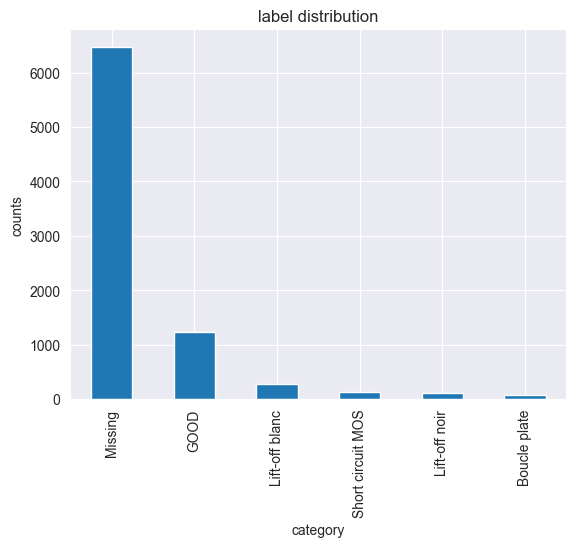

In [3]:
# Example: Plotting histograms of all numerical features

#01 label
label_df['Label'].value_counts().plot(kind='bar')
plt.title('label distribution')
plt.ylabel('counts')
plt.xlabel('category')

In [4]:
label_df['Label'].value_counts()

Label
Missing              6472
GOOD                 1235
Lift-off blanc        270
Short circuit MOS     126
Lift-off noir         104
Boucle plate           71
Name: count, dtype: int64

<Axes: ylabel='count'>

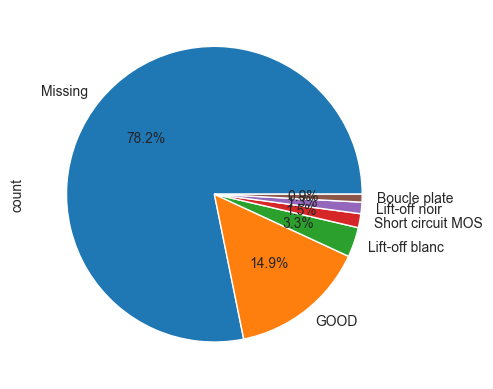

In [5]:
label_df['Label'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [72]:
#load images from disk into list

label_df_sortedFilenames = label_df.sort_values('filename') #sort df filename entires alphanumerically

ImgList = list()

LabelNum = label_df.shape[0]
ImageNum = label_df.shape[0]

for i in range(ImageNum):
  temp_path = image_path  + '/' + label_df_sortedFilenames['filename'].iloc[i]

  if np.mod(i,100) == 0:
      print('{} images processed'.format(i))

  try:
    #with Image.open(temp_path) as img:
        #print(img)
    img = tf.keras.utils.load_img(
        temp_path,
        color_mode="grayscale",
        target_size=[200,200],
        interpolation="nearest",
        keep_aspect_ratio=False,
    )

    ImgList.append(img.copy())
  except:
    print('Failed to load image at index {}'.format(i))



0 images processed
100 images processed
200 images processed
300 images processed
400 images processed
500 images processed
600 images processed
700 images processed
800 images processed
900 images processed
1000 images processed
1100 images processed
1200 images processed
1300 images processed
1400 images processed
1500 images processed
1600 images processed
1700 images processed
1800 images processed
1900 images processed
2000 images processed
2100 images processed
2200 images processed
2300 images processed
2400 images processed
2500 images processed
2600 images processed
2700 images processed
2800 images processed
2900 images processed
3000 images processed
3100 images processed
3200 images processed
3300 images processed
3400 images processed
3500 images processed
3600 images processed
3700 images processed
3800 images processed
3900 images processed
4000 images processed
4100 images processed
4200 images processed
4300 images processed
4400 images processed
4500 images processed


In [58]:
label_df_sortedFilenames['filename'].iloc[8200]

'fd880bd2e256cc79fccc7053f298e217c98c8b81ef913ebaff5de4ccede1167b.png'

In [73]:
# add image data to pandas dataframe for easier sorting etc.
label_df_sortedFilenames['images'] = ImgList

label_df_sortedFilenames.head()

,Unnamed: 0,filename,window,lib,Label,images
1798,1798,00012893103b993a56e6bc460ea98a7e5cbd96b1b7277c...,2005,Die02,Missing,<PIL.Image.Image image mode=L size=200x200 at ...
1799,1799,0003d3829d9f6601d6589ab3269a3506a6db1398f3da18...,2005,Die02,GOOD,<PIL.Image.Image image mode=L size=200x200 at ...
5749,5749,000a14a35b75d3e62866a225d56fa66f2a504dada69186...,2005,Die01,GOOD,<PIL.Image.Image image mode=L size=200x200 at ...
726,726,000c1ecc3a520c1948aea5b5d969ade21ffb6d0675ee0f...,2003,Die03,Missing,<PIL.Image.Image image mode=L size=200x200 at ...
1017,1017,000d2a30b5b5def35888327c7332bcdfa1c70c87dbc644...,2003,Die04,Lift-off blanc,<PIL.Image.Image image mode=L size=200x200 at ...


Text(0.5, 0, 'Lift-off blanc')

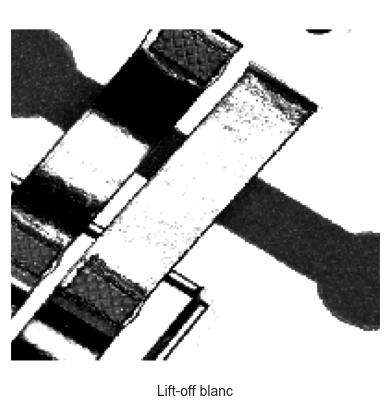

In [74]:
# plot some images to make sure that images are correctly loaded.

plotIndex = 301
plt.figure()
plt.imshow(label_df_sortedFilenames['images'].iloc[plotIndex],cmap='gray')
plt.xticks([])
plt.yticks([])
plt.xlabel(label_df_sortedFilenames['Label'].iloc[plotIndex])

In [75]:
# use df.sample to extract data
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html

total_item_num = 1200 #rough number of GOOD images

GOOD_df = label_df_sortedFilenames[label_df_sortedFilenames['Label'] == 'GOOD']
Missing_df = label_df_sortedFilenames[label_df_sortedFilenames['Label'] == 'Missing']

GOOD_df_sampled = GOOD_df.sample(n=total_item_num)
Missing_df_sampled = Missing_df.sample(n=total_item_num)

BalancedDF = pd.concat([GOOD_df_sampled,Missing_df_sampled],axis=0)
#randomize order
BalancedDF = BalancedDF.sort_values('filename') # filenames have no particular order
BalancedDF.head()

,Unnamed: 0,filename,window,lib,Label,images
1799,1799,0003d3829d9f6601d6589ab3269a3506a6db1398f3da18...,2005,Die02,GOOD,<PIL.Image.Image image mode=L size=200x200 at ...
5749,5749,000a14a35b75d3e62866a225d56fa66f2a504dada69186...,2005,Die01,GOOD,<PIL.Image.Image image mode=L size=200x200 at ...
2443,2443,0015f5b2a927f9f8c1395ab89e88073d3bfb5637768fab...,2005,Die04,GOOD,<PIL.Image.Image image mode=L size=200x200 at ...
4738,4738,001abd35aa4e374ef55c3bc0c4087486dc25925823ca7f...,2003,Die03,Missing,<PIL.Image.Image image mode=L size=200x200 at ...
1435,1435,0029efd30b64c58ff97fc82e62ffa3bf8a9bc29e8cb5a0...,2005,Die01,Missing,<PIL.Image.Image image mode=L size=200x200 at ...


In [76]:
BalancedDF['Label'].value_counts()

Label
GOOD       1200
Missing    1200
Name: count, dtype: int64

In [77]:
# need Y train is numbers
# https://stackoverflow.com/questions/42320834/sklearn-changing-string-class-label-to-int
#test_data_df["LabelInt"] = test_data_df["Label"].factorize()

from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(BalancedDF["Label"])
#test_data_df['LabelInt'] = le.transform(test_data_df["Label"])
BalancedDF.loc[:,'LabelInt'] =  le.transform(BalancedDF.loc[:,"Label"]) #using .loc COPIES the entries from a dataframe

Text(0.5, 0, 'GOOD')

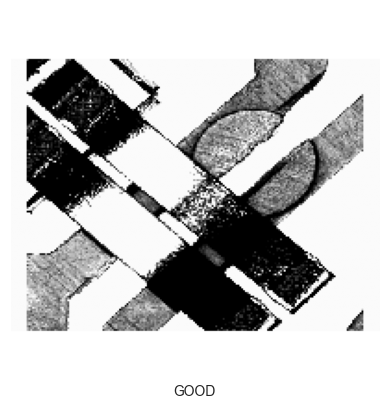

In [78]:
plotIndex = 502
plt.figure()
plt.imshow(BalancedDF['images'].iloc[plotIndex],cmap='gray')
plt.xticks([])
plt.yticks([])
plt.xlabel(BalancedDF['Label'].iloc[plotIndex])

In [81]:
train_split = 0.7
val_split = 0.15
test_split = 0.15

combined_num = total_item_num*2

#calc indices
train_num = np.floor(combined_num*train_split).astype('int')
val_num = np.floor(combined_num*val_split).astype('int')
test_num = np.floor(combined_num*test_split).astype('int')

train_data_df = BalancedDF.iloc[0:train_num]
val_data_df = BalancedDF.iloc[train_num+1:train_num+val_num]
test_data_df = BalancedDF.iloc[train_num+val_num+1:train_num+val_num+test_num]

In [82]:
train_data_df['Label'].value_counts()

Label
Missing    845
GOOD       835
Name: count, dtype: int64

In [66]:
val_data_df['Label'].value_counts()

Label
GOOD       185
Missing    174
Name: count, dtype: int64

In [67]:
test_data_df['Label'].value_counts()

Label
Missing    185
GOOD       174
Name: count, dtype: int64

In [14]:
# classes are balanced enough
# most likely much more efficient to do the balancing / up or downsampling using tf and/or keras native functions and methods




In [97]:
from skimage.feature import hog
from skimage.filters import sobel
from skimage.transform import resize

def extract_rich_features(images, bins_per_channel=16, hog_pixels_per_cell=(8,8),target_res = [200,200]):
    features = []
    for img in images:

        img_res = resize(img,target_res)

        hist_features = []
        hist, _ = np.histogram(img_res, bins=bins_per_channel, range=(0, 255))
        hist_features.extend(hist)

        #gray_img = rgb2gray(img)
        hog_features = hog(
            img_res,
            pixels_per_cell=hog_pixels_per_cell,
            cells_per_block=(1,1),
            orientations=9,
            block_norm='L2-Hys',
            feature_vector=True
        )

        edges = sobel(img_res)
        edge_density = np.sum(edges > 0.1) / edges.size

        combined = np.hstack([hist_features, hog_features, edge_density])
        features.append(combined)
        #print(combined.shape)

    return np.array(features, dtype=np.float32)



In [54]:
features = extract_rich_features(train_data_df['images'])

features_test = extract_rich_features(test_data_df['images'])


In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(features, train_data_df['Label'])

y_pred_rf = rf_model.predict(features_test)

print("MODEL 3. Random Forest (Color histograms + HOG + Edge density)")
print("Accuracy:", accuracy_score(test_data_df['Label'], y_pred_rf))
print(classification_report(test_data_df['Label'], y_pred_rf)) #target_names=class_names))

MODEL 3. Random Forest (Color histograms + HOG + Edge density)
Accuracy: 1.0
              precision    recall  f1-score   support

        GOOD       1.00      1.00      1.00       177
     Missing       1.00      1.00      1.00       182

    accuracy                           1.00       359
   macro avg       1.00      1.00      1.00       359
weighted avg       1.00      1.00      1.00       359



In [84]:
IMAGE_HEIGHT = 200
IMAGE_WIDTH = 200


model_CNN_base = tf.keras.Sequential([
    #tf.keras.layers.Resizing(IMAGE_HEIGHT, IMAGE_WIDTH,pad_to_aspect_ratio=True),
    tf.keras.layers.Input((IMAGE_HEIGHT, IMAGE_WIDTH, 3)),
    tf.keras.layers.Rescaling(1/255),
    # data_augmentation_layers,

    tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

model_CNN_base.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_4 (Rescaling)         │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 97, 97, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 46, 46, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 67712)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     8,667,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,760,641 (33.42 MB)

 Trainable params: 8,760,641 (33.42 MB)

 Non-trainable params: 0 (0.00 B)

In [85]:
model_CNN_base.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=["accuracy"],
)

In [86]:
dataset_df = train_data_df[['images','LabelInt']]

dataset_df.head()

,images,LabelInt
1799,<PIL.Image.Image image mode=L size=200x200 at ...,0
5749,<PIL.Image.Image image mode=L size=200x200 at ...,0
2443,<PIL.Image.Image image mode=L size=200x200 at ...,0
4738,<PIL.Image.Image image mode=L size=200x200 at ...,1
1435,<PIL.Image.Image image mode=L size=200x200 at ...,1


In [87]:
# https://www.tensorflow.org/tutorials/load_data/pandas_dataframe
# loading pandas dataframe SHOULD work
# try converting data to a tensor


history = model_CNN_base.fit(
    dataset_df,
    #validation_data=((val_data_df['images'].to_numpy(),val_data_df['LabelInt'].to_numpy())),
    epochs=5,
)


ValueError: Invalid dtype: object

In [47]:
train_data_df['images'].shape

(1680,)

In [49]:
train_data_df['LabelInt'].to_numpy().shape

(1680,)

In [50]:
#test = tf.convert_to_tensor(train_data_df['LabelInt'])
#test2 = tf.convert_to_tensor(train_data_df['images'].iloc[0])

#tf.convert_to_tensor(train_data_df['images'].iloc[1])
# #train_data_df['images'].iloc[1]

In [89]:
#PILimageTest = Image.fromarray(train_data_df['images'].iloc[0])

#bb = (train_data_df['images'].iloc[21],train_data_df['images'].iloc[3])

test2 = tf.convert_to_tensor(train_data_df['images'])

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type Image).

In [127]:
c = train_data_df['images'].to_numpy()

c.shape

(1680,)

In [129]:
#try resizing images first

#IMAGE_HEIGHT = 200
#IMAGE_WIDTH = 200

#train_data_df.loc[:,'images_resize'] = resize(train_data_df.loc[:,'images'],[IMAGE_HEIGHT,IMAGE_HEIGHT])


ValueError: Cannot convert from object to float64.

In [132]:
tf.convert_to_tensor(train_data_df['images'].values.astype(np.float32))

ValueError: setting an array element with a sequence.

In [140]:
train_data_df['images'].astype('float32')#.to_numpy()

ValueError: setting an array element with a sequence.

In [44]:
images = train_data_df['images']
labels = train_data_df['LabelInt']

#images = np.array([np.array(val) for val in images])

#dataset = tf.data.Dataset.from_tensor_slices((images,labels))

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type Image).